In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import girth
# from girth import rasch_conditional
from irt.data.rasch import generate_data
from irt.algorithms import spectral_estimator
from irt.algorithms import conditional_mle
from irt.algorithms import rasch_mml
from irt.algorithms import eigen_vector_method

# import data (you supply this function)
# my_data = import_data(filename)

# # Assume its dichotomous data with True -> 1 and False -> 0
# tagged_data = tag_missing_data(my_data, [0, 1])

In [39]:
m = 10
p = 1.
betas = np.random.normal(size=(m,))
betas -= np.min(betas)
z = np.exp(betas)
z = z / np.sum(z)

n = 100
# theta_students = np.random.normal(size=(n,))
theta_students = np.zeros((n,))
data = generate_data(betas, theta_students, p)

z_est_ase = spectral_estimator.spectral_estimate(data, accelerated=True)
z_est_mmle = rasch_mml.rasch_mml(data)

In [40]:
np.linalg.norm(z_est_mmle - z)/np.linalg.norm(z)

0.35406782548298643

In [41]:
np.linalg.norm(z_est_ase - z)/np.linalg.norm(z)

0.2637997722633451

In [34]:
def relative_betas_error(beta, betah):
    return np.linalg.norm(beta - betah)/np.linalg.norm(beta)

def relative_z_error(beta, betah):
    z = np.exp(beta)
    z /= np.sum(z)
    zh = np.exp(betah)
    zh /= np.sum(zh)
    return np.linalg.norm(z - zh)/np.linalg.norm(z)

def relative_z_err(z, zh):
    return np.linalg.norm(z - zh)/np.linalg.norm(z)
    

In [53]:


errors_arr = []
errors_ase_arr = []
errors_cmle_arr = []
errors_mmle_arr = []
errors_choppin_arr = []
errors_garner_arr = []
errors_saaty_arr = []

time_arr = []
time_ase_arr = []
time_cmle_arr = []
time_mmle_arr = []
time_choppin_arr = []
time_garner_arr = []
time_saaty_arr = []

n_array = [50, 100, 200, 500]
n_trials = 50
m = 10


p = 0.2


for n in n_array:

    
    # w_students = np.ones((n,))
    # p = np.sqrt(np.log(m)/n)
    
    error_ase = 0.
    error_cmle = 0.
    error_mmle = 0.
    error_choppin = 0.
    error_garner = 0.
    error_saaty = 0.
    
    time_ase = 0.
    time_cmle = 0.
    time_mmle = 0.
    time_garner = 0.
    time_choppin = 0.
    time_saaty = 0.
    
    for _ in range(n_trials):
        betas = np.random.normal(size=(m,))
        # betas -= np.min(betas)
        z = np.exp(betas)
        z = z/ np.sum(z)
        theta_students = np.random.normal(size=(n,))
        # thetas = np.zeros((n,))
        
        data = generate_data(betas, thetas, p)
        
        # Conditional MLE
        start = time.time()
        z_est_cmle = conditional_mle.rasch_conditional(data)
        time_cmle += 1./n_trials * (time.time() - start)
        error_cmle += 1./n_trials * np.linalg.norm(z - z_est_cmle)/np.linalg.norm(z)
        
        # Marginal MLE
        start = time.time()
        z_est_mmle = rasch_mml.rasch_mml(data)
        time_mmle += 1./n_trials * (time.time() - start)
        # error_mmle += 1./n_trials * np.linalg.norm(betas - z_est_mle) #/np.linalg.norm(betas)
        # error_mmle += 1./n_trials * relative_z_error(betas, z_est_mmle)
        error_mmle += 1./n_trials * np.linalg.norm(z_est_mmle - z)/np.linalg.norm(z)

        # Accelerated spectral method
        start = time.time()
        z_est_ase = spectral_estimator.spectral_estimate(data, accelerated=True)
        time_ase += 1./n_trials * (time.time() - start)
        # error_ase += 1./n_trials * np.linalg.norm(betas - z_est_ase) #/np.linalg.norm(betas)
        # error_ase += 1./n_trials * relative_z_error(betas, z_est_ase)
        error_ase += 1./n_trials * np.linalg.norm(z_est_ase - z)/np.linalg.norm(z)
        
#         # Choppin method
#         start = time.time()
#         z_est_choppin = eigen_vector_method.choppin_method(data)
#         time_choppin += 1./n_trials * (time.time() - start)
#         error_choppin += 1./n_trials * np.linalg.norm(betas - z_est_choppin)/np.linalg.norm(betas)
        
#         # Garner
#         start = time.time()
#         z_est_garner = eigen_vector_method.garner_method(data)
#         time_garner += 1./n_trials * (time.time() - start)
#         error_garner += 1./n_trials * np.linalg.norm(betas - z_est_garner)/np.linalg.norm(betas)
        
#         # Saaty's method
#         start = time.time()
#         z_est_saaty = eigen_vector_method.saaty_method(data)
#         time_saaty += 1./n_trials * (time.time() - start)
#         error_saaty += 1./n_trials * np.linalg.norm(betas - z_est_saaty)/np.linalg.norm(betas)
        

    errors_ase_arr.append(error_ase)
    errors_cmle_arr.append(error_cmle)
    errors_mmle_arr.append(error_mmle)
    errors_choppin_arr.append(error_choppin)
    errors_garner_arr.append(error_garner)
    errors_saaty_arr.append(error_saaty)
    
    time_ase_arr.append(time_ase)
    time_cmle_arr.append(time_cmle)
    time_mmle_arr.append(time_mmle)
    time_choppin_arr.append(time_choppin)
    time_garner_arr.append(time_garner)
    time_saaty_arr.append(time_saaty)
    
    print(f"n={n}, m={m}, ASE={error_ase} ({time_ase}), CMLE={error_cmle} ({time_cmle}), MMLE={error_mmle} ({time_mmle}), " +
          f"Choppin={error_choppin} ({time_choppin}), Garner={error_garner} ({time_garner}), Saaty={error_saaty} ({time_saaty})")

n=50, m=10, ASE=0.25105323575203586 (0.001042943000793457), CMLE=0.24922895442437273 (0.16494346141815186), MMLE=0.23815601992342822 (0.006163806915283202), Choppin=0.0 (0.0), Garner=0.0 (0.0), Saaty=0.0 (0.0)
n=100, m=10, ASE=0.2671858544428773 (0.0010685205459594726), CMLE=0.25797773084372577 (0.1685338163375854), MMLE=0.23663597254448612 (0.006374273300170897), Choppin=0.0 (0.0), Garner=0.0 (0.0), Saaty=0.0 (0.0)
n=200, m=10, ASE=0.25400495453995403 (0.0010238599777221678), CMLE=0.261520446665614 (0.1628914499282837), MMLE=0.22519660731754443 (0.006084342002868649), Choppin=0.0 (0.0), Garner=0.0 (0.0), Saaty=0.0 (0.0)
n=500, m=10, ASE=0.26027811698619513 (0.0010433292388916016), CMLE=0.2554399104547411 (0.16515130996704094), MMLE=0.24443993913642553 (0.006075410842895508), Choppin=0.0 (0.0), Garner=0.0 (0.0), Saaty=0.0 (0.0)


In [ ]:
plt.plot(n_array, errors_mmle_arr, label="Marginal MLE")
plt.plot(n_array, errors_cmle_arr, label="Conditional MLE")
plt.plot(n_array, errors_ase_arr, label="Accelerated Spectral Method")
# plt.plot(n_array, errors_choppin_arr, label="Choppin Method")
# plt.plot(n_array, errors_garner_arr, label="Garner Method")
# plt.plot(n_array, errors_saaty_arr, label="Saaty Method")


plt.legend()
plt.title(rf"m={m},p=sqrt(log m/n)")
plt.xlabel("n")
plt.ylabel(r'$|| \beta - \beta^*||/||\beta^*|| $')
# plt.title(r'$d = mnp^2$, $p = \sqrt{\log m/n}$')

Text(0, 0.5, 'Time (s)')

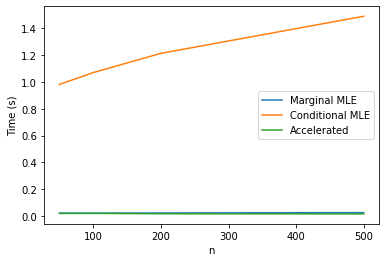

In [30]:
plt.plot(n_array, time_mmle_arr, label="Marginal MLE")
plt.plot(n_array, time_cmle_arr, label="Conditional MLE")
plt.plot(n_array, time_ase_arr, label="Accelerated")

plt.legend()
plt.xlabel("n")
plt.ylabel('Time (s)')